In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud

/tmp/ipykernel_1539/3066386106.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
nlp_data_path = '../Data/nlp_set/corpus_tf_1.csv'
bit_data_path = '../Data/bioit_set/corpus_tf_1.csv'

In [3]:
nlp_data = pd.read_csv(nlp_data_path).sort_values(by='max_dimer_freq', ascending=False)
bit_data = pd.read_csv(bit_data_path).sort_values(by='max_dimer_freq', ascending=False)

In [59]:
def df_tf_plot(data, title:str=None, threshold=0.5, ax=None):
    count_by_dim_freq = data.groupby('max_dimer_freq').agg({'term':'count'}).reset_index()
    if ax is None:
        ax = plt.gca()
    count_by_dim_freq.plot.bar(x='max_dimer_freq', y='term', legend=None,ax=ax)
    if title is not None:
        ax.set_title(title)
    else:
        ax.set_ylabel('term_count')
    ax.axvline(x=int(threshold*10))

def plot_wordcloud(term_list:list, title:str=None, ax=None):
    long_string = ','.join(term_list)
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    wordcloud.generate(long_string)
    
    # Adjust the plotting based on whether an ax is provided
    if ax is not None:
        # Use the provided axes object for plotting
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')  # Hide the axes
        if title is not None:
            ax.set_title(title)  # Set title if provided
    else:
        # No axes object provided, use plt to create and show the plot
        plt.figure(figsize=(6, 4))  # Optional: Adjust figure size
        plt.imshow(wordcloud, interpolation='bilinear')
        if title is not None:
            plt.title(title)
        plt.axis('off')  # Hide the axes
        plt.show()
           


In [66]:
def check_threshold(data,value=0.5):
    print(f'Testing with dimer frequency threshold = {value}.')
    noise = data[data['max_dimer_freq']>=value]
    df_tf_plot(noise, title='Noise term distribution by dimer frequency')
    plot_wordcloud(noise['term'], title='Noise wordcloud')
    clean = data[data['max_dimer_freq']<value]
    display(noise.tail(15))
    df_tf_plot(clean, title='Clean data term distribution by dimer frequency')
    plot_wordcloud(clean['term'], title='Clean data wordcloud')

In [61]:
def grid_plot(data, step=0.1):
    thresholds = np.arange(0, 1.1, step)
    nrows = len(thresholds)  # Determined by the number of thresholds
    ncols = 4  # Fixed number of columns: two for df_tf plots, two for word clouds
    
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))  # Adjusted figsize for better layout
    
    for i, threshold in enumerate(thresholds):
        noise = data[data['max_dimer_freq'] >= threshold]
        clean = data[data['max_dimer_freq'] < threshold]
        
        # Adjusting call to df_tf_plot and plot_wordcloud to use current axis
        if not noise.empty:
            df_tf_plot(noise, title=f'Noise >= {threshold:.1f}', threshold=threshold, ax=axs[i, 0])
            plot_wordcloud(noise['term'].tolist(), title='Noise Wordcloud', ax=axs[i, 2])
        else:
            axs[i, 0].text(0.5, 0.5, 'No noise data', ha='center', va='center', transform=axs[i, 0].transAxes)
            axs[i, 2].axis('off')
        
        if not clean.empty:
            df_tf_plot(clean, title=f'Clean < {threshold:.1f}', threshold=threshold, ax=axs[i, 1])
            plot_wordcloud(clean['term'].tolist(), title='Clean Wordcloud', ax=axs[i, 3])
        else:
            axs[i, 1].text(0.5, 0.5, 'No clean data', ha='center', va='center', transform=axs[i, 1].transAxes)
            axs[i, 3].axis('off')

    plt.tight_layout()
    plt.show()

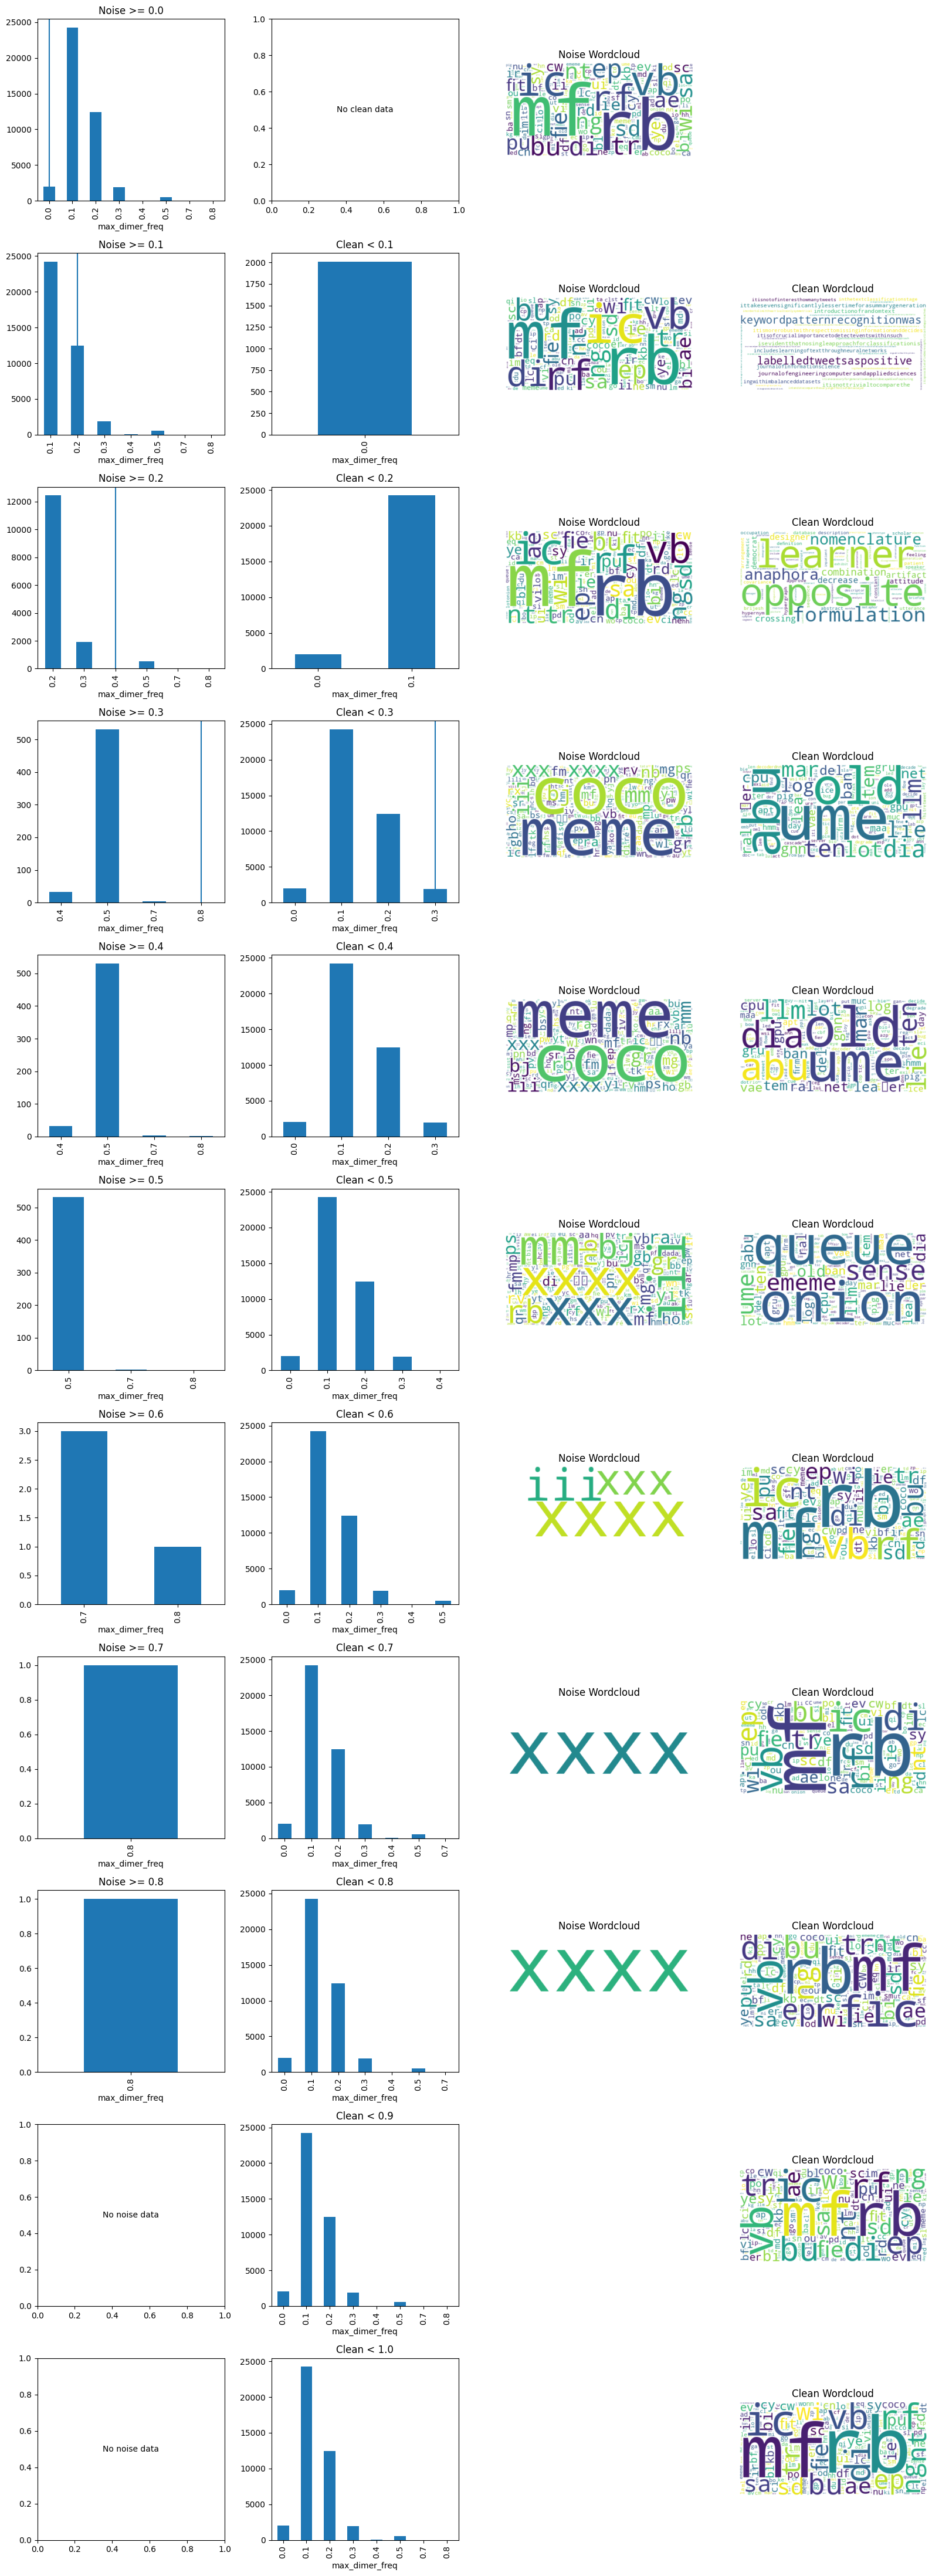

In [62]:
grid_plot(nlp_data)

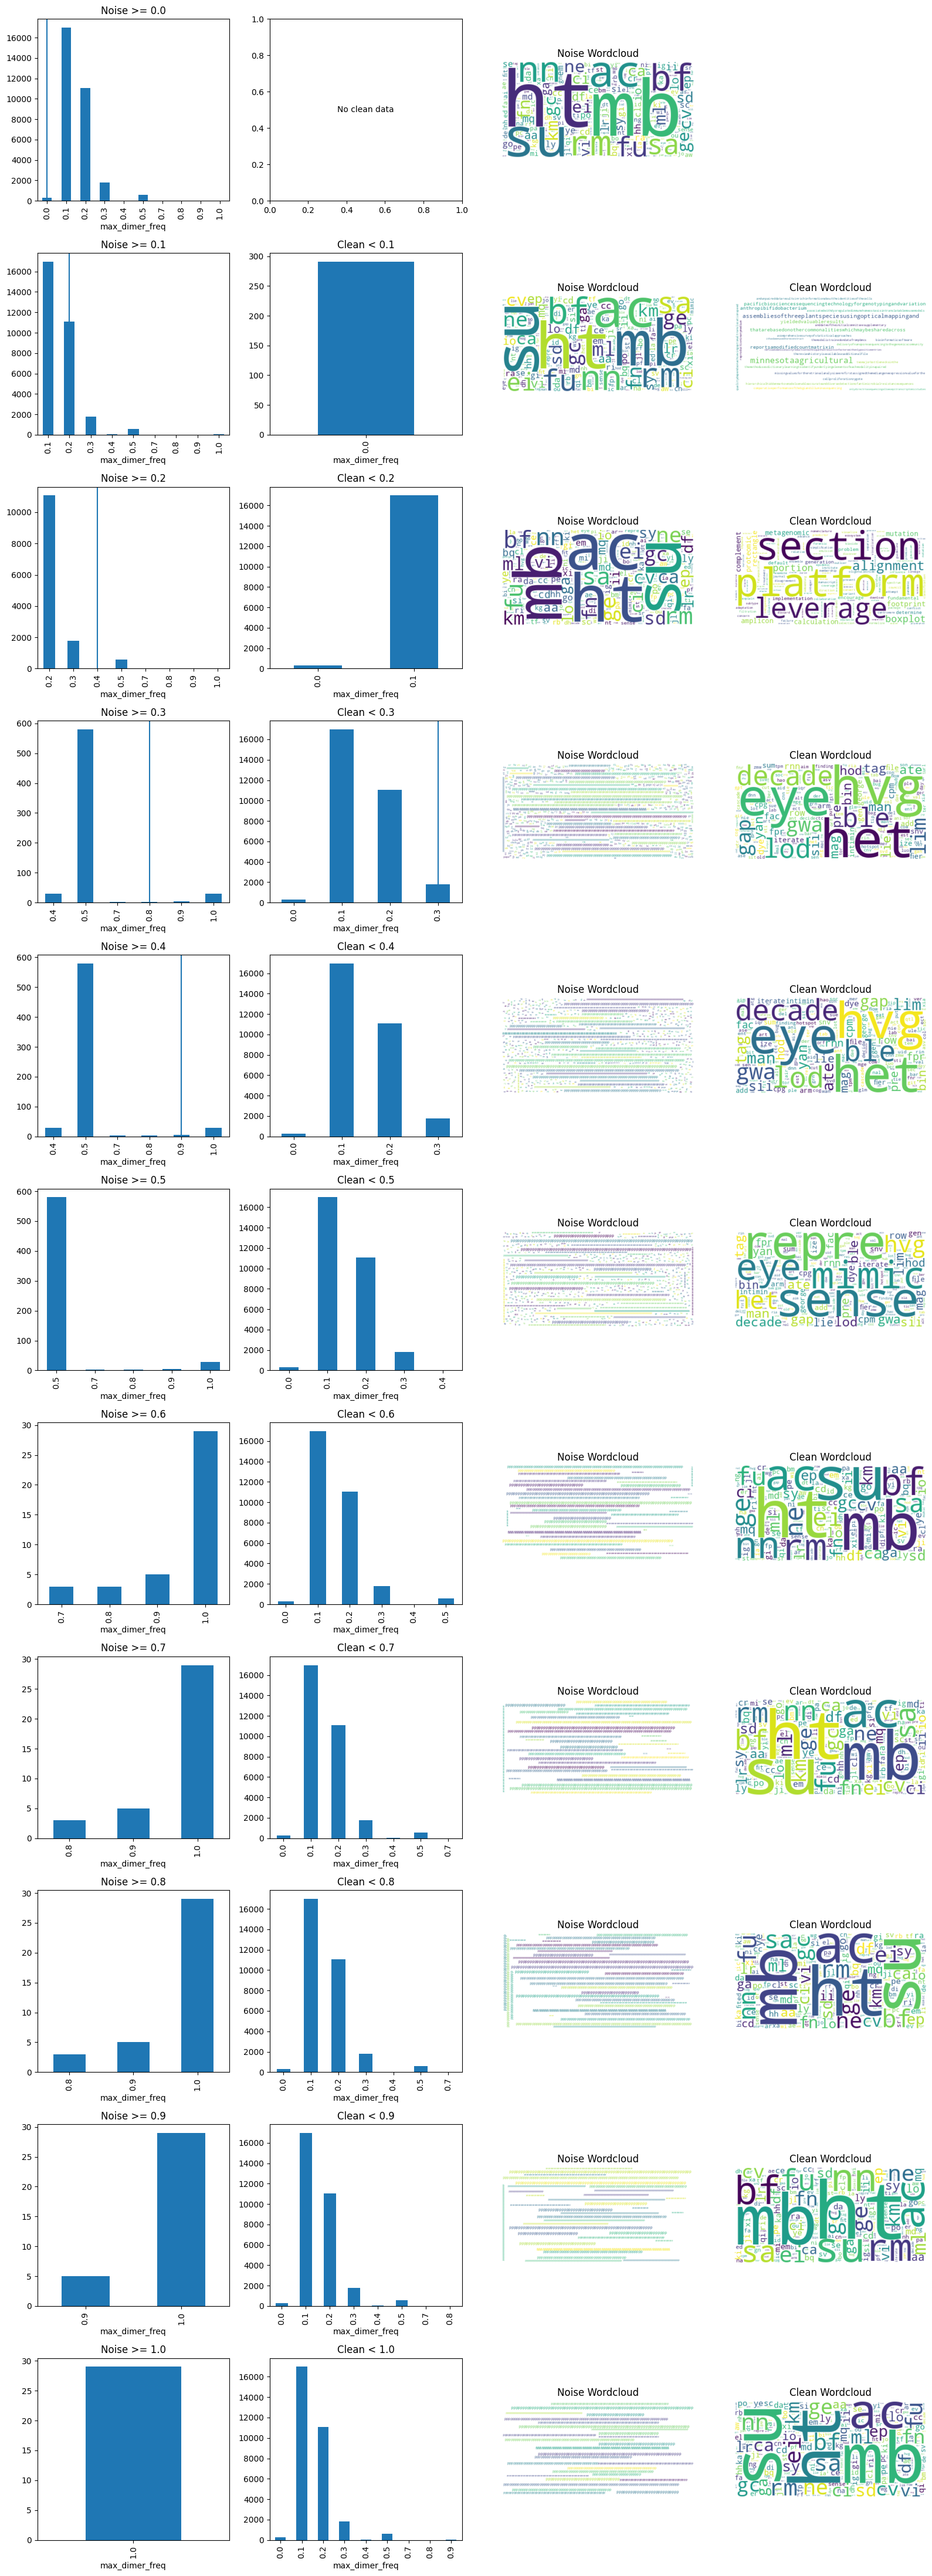

In [67]:
grid_plot(bit_data)

Testing with dimer frequency threshold = 0.5.


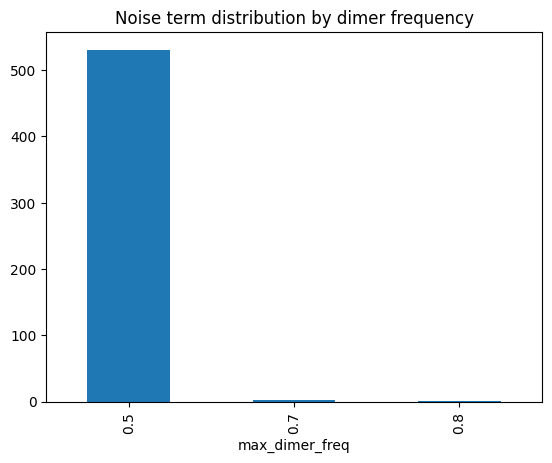

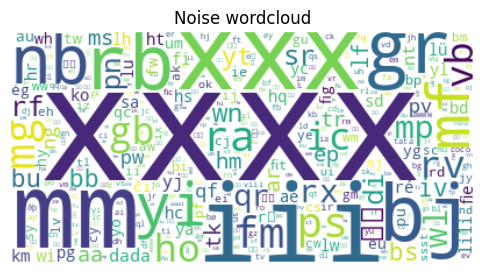

term  frequency  token_len  max_char_count  max_dimer_freq
7764    eg          5          2               1             0.5
11050   ﬁx          3          2               1             0.5
40144   kn          1          2               1             0.5
15336   dd          2          2               2             0.5
400     de        164          2               1             0.5
10706   ru          3          2               1             0.5
7787    mo          5          2               1             0.5
3465    ri         15          2               1             0.5
8179    𝑤𝑘          4          2               1             0.5
7757    ds          5          2               1             0.5
40155   kk          1          2               2             0.5
7802    ew          5          2               1             0.5
3984    𝐽𝐷         12          2               1             0.5
20814   sj          1          2               1             0.5
11051   td          3          2               1             0.5

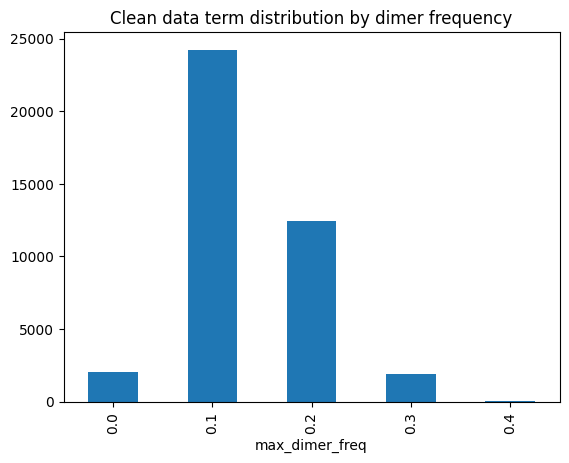

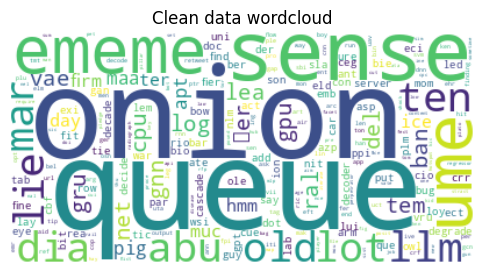

In [68]:
check_threshold(nlp_data, value=0.5)

Testing with dimer frequency threshold = 0.5.


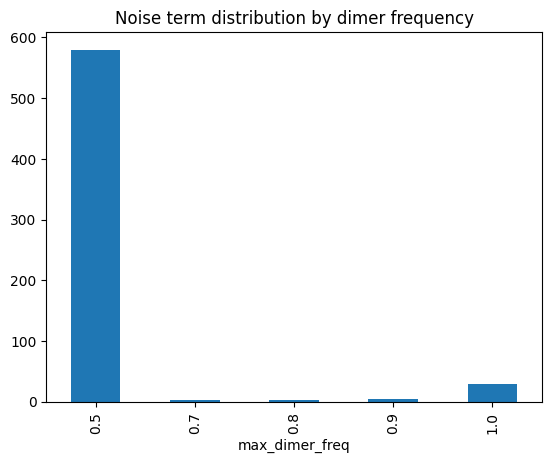

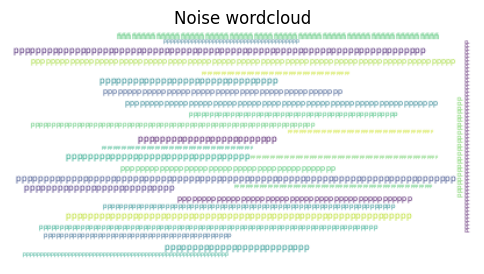

term  frequency  token_len  max_char_count  max_dimer_freq
5944     en          5          2               1             0.5
10308    yd          2          2               1             0.5
20460    aø          1          2               1             0.5
18824    µm          1          2               1             0.5
18823    às          1          2               1             0.5
19305    wk          1          2               1             0.5
4914     bh          7          2               1             0.5
18629    yx          1          2               1             0.5
5644     gm          6          2               1             0.5
5418     µl          6          2               1             0.5
18627    yy          1          2               2             0.5
18849    zq          1          2               1             0.5
5107     pi          7          2               1             0.5
16998    rþ          1          2               1             0.5
9667   nene          2          4               2             0.5

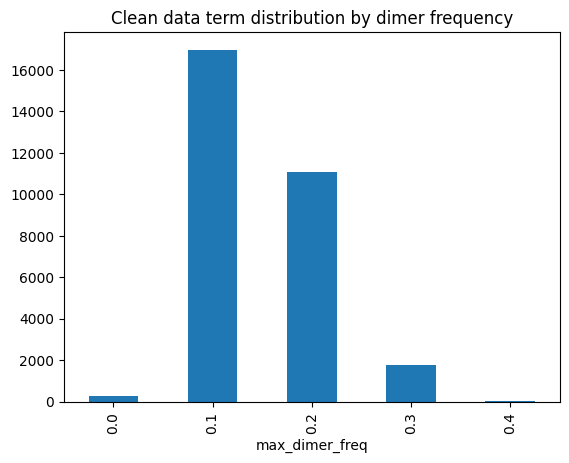

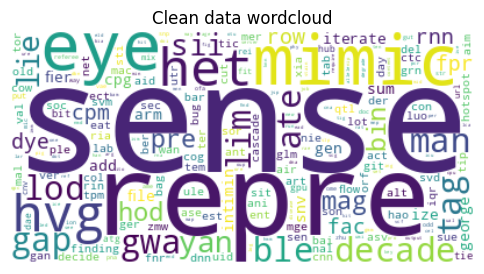

In [69]:
check_threshold(bit_data, value=0.5)